<font size="5">**2. Data Preprocessing**</font>

<font size="4">**2.1 Import Packages**</font>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

<font size="4">**2.2 Import Dataset**</font>

In [329]:
data = pd.read_csv("fraud_oracle.csv")

In [519]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [330]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=5)
for train_index1, test_index1 in split1.split(data, data["FraudFound_P"]):
    fraud_train = data.loc[train_index1]
    fraud_val_test = data.loc[test_index1]

fraud_val_test.reset_index(drop=True, inplace=True)
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=5)
for train_index2, test_index2 in split2.split(fraud_val_test, fraud_val_test["FraudFound_P"]):
    fraud_val = fraud_val_test.loc[train_index2]
    fraud_test = fraud_val_test.loc[test_index2]

In [331]:
#final split dataframes
fraud_train.reset_index(drop=True, inplace=True) 
fraud_val.reset_index(drop=True, inplace=True) 
fraud_test.reset_index(drop=True, inplace=True)

In [332]:
data_train = fraud_train.copy()
data_val=fraud_val.copy()
data_test=fraud_test.copy()

<font size="4">**2.3 Data Preprocessing**</font>

<font size="3.5">**2.3.1 Drop Irrelevant Columns**</font>

In [333]:
data_train= data_train.drop(columns=['PolicyNumber','RepNumber','Year'])
data_test= data_test.drop(columns=['PolicyNumber','RepNumber','Year'])
data_val= data_val.drop(columns=['PolicyNumber','RepNumber','Year'])

In [221]:
data_train.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Feb,3,Wednesday,Honda,Urban,Monday,Feb,3,Male,Married,...,none,more than 7,36 to 40,No,No,External,none,no change,3 to 4,Collision
1,May,2,Monday,Toyota,Urban,Tuesday,May,2,Male,Married,...,1,more than 7,51 to 65,No,No,External,1 to 2,no change,1 vehicle,Collision
2,Dec,1,Tuesday,Toyota,Urban,Friday,Dec,2,Male,Married,...,2 to 4,5 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,Liability
3,Apr,1,Saturday,Mazda,Urban,Wednesday,Apr,1,Male,Single,...,none,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
4,Mar,4,Wednesday,Dodge,Urban,Friday,Mar,4,Male,Married,...,1,more than 7,41 to 50,No,No,External,1 to 2,no change,1 vehicle,Collision


<font size="3.5">**2.3.2 Fill in Missing Values**</font>

In [222]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

There is no missing value in our dataset

But as we see from the data exploration part:
DayOfWeekClaimed - contains a 0 instead of a day of the week
MonthClaimed - contains a 0 instead of the month
Age - contains a 0 instead of the necessary age
So we will deal with these issues now.

In [334]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(data.loc[(data['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(data.loc[(data['MonthClaimed']=='0')]),' row(s) with a 0') 
print(' ')

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0
 


In [335]:
#Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, I will drop
data_train = data_train.loc[data['DayOfWeekClaimed']!='0']
data_test = data_test.loc[data['DayOfWeekClaimed']!='0']
data_val = data_val.loc[data['DayOfWeekClaimed']!='0']

In [336]:
#how many rows where the feature Age is assigned a zero, 
print(len(data[data['Age']==0]))

320


In [337]:
data.loc[data['Age']==0, 'AgeOfPolicyHolder']
#every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.

7        16 to 17
13       16 to 17
28       16 to 17
31       16 to 17
58       16 to 17
           ...   
15243    16 to 17
15262    16 to 17
15274    16 to 17
15379    16 to 17
15392    16 to 17
Name: AgeOfPolicyHolder, Length: 320, dtype: object

In [338]:
#does the comparision of value for age to the value of the AgeOfPolicyHolder
groupings = []
for holder in data['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)
                        
age_idx = []
rw_idx = []

In [339]:
#Assigns an age of 16.5 to all rows with missing Age values
data_age0_idx = (data_train['Age']==0)
data_train.loc[list(data_age0_idx),'Age']=16.5
data_age0_idx = (data_test['Age']==0)
data_test.loc[list(data_age0_idx),'Age']=16.5
data_age0_idx = (data_val['Age']==0)
data_val.loc[list(data_age0_idx),'Age']=16.5

In [340]:
data_train=data_train.drop(columns=['AgeOfPolicyHolder'])
data_test=data_test.drop(columns=['AgeOfPolicyHolder'])
data_val=data_val.drop(columns=['AgeOfPolicyHolder'])

<font size="4">**2.4 Variable Correlation**</font>

In [341]:
corr = data.corr()['FraudFound_P'].sort_values()

print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
Age                  -0.029741
Year                 -0.024760
PolicyNumber         -0.020345
WeekOfMonth          -0.011861
RepNumber            -0.007551
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64

Top 10 - Negative Correlations:
------------------------------
Age                  -0.029741
Year                 -0.024760
PolicyNumber         -0.020345
WeekOfMonth          -0.011861
RepNumber            -0.007551
WeekOfMonthClaimed   -0.005761
DriverRating          0.007266
Deductible            0.017348
FraudFound_P          1.000000
Name: FraudFound_P, dtype: float64


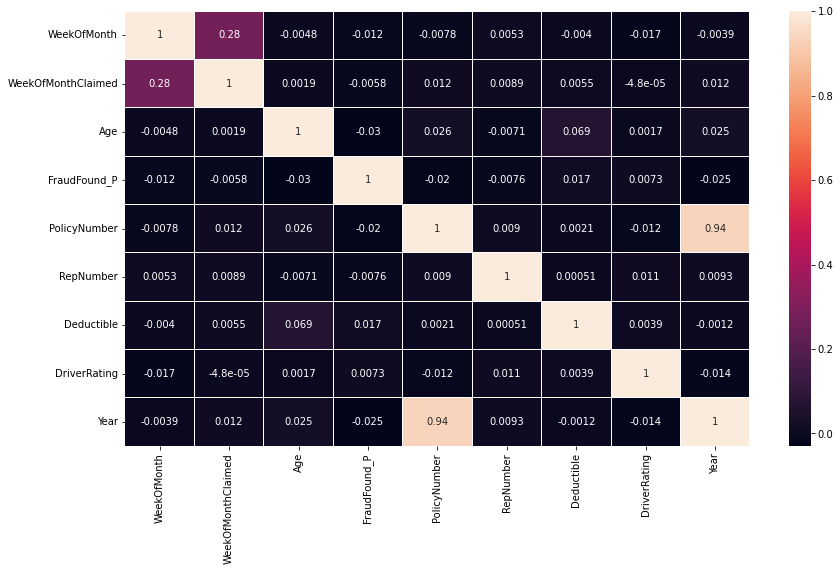

In [342]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot = True,  linewidths=.05) 

<font size="3.5">**Insights**</font><br>We consider variables are highly correlated when > 0.80 :<br>
--> there is no high correlation between variables

KeyboardInterrupt: ignored

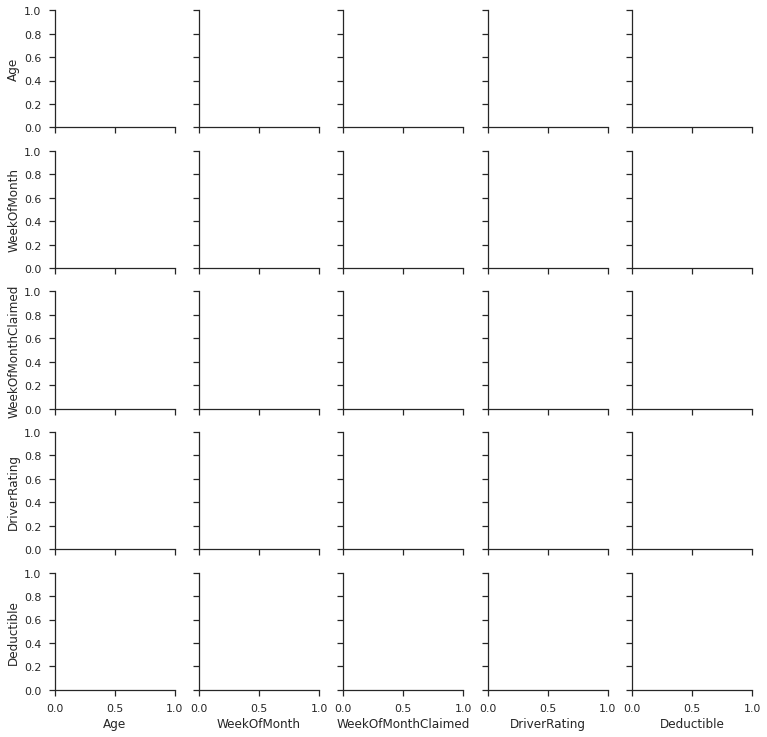

In [ ]:
sns.set(style="ticks")

vars= ["Age", "WeekOfMonth", "WeekOfMonthClaimed","DriverRating","Deductible"]

p = pairplot(data, vars=vars, hue="FraudFound_P", kind="reg")

<font size="4">**2.5.1 Specific data types of Columns**</font>

Text(0, 0.5, 'Data type')

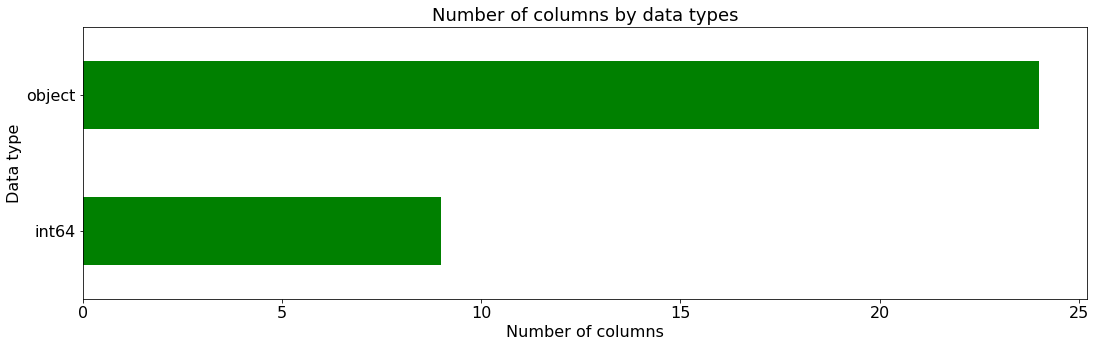

In [343]:
data.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

<font size="4">**2.5.2 Number of Categories for each object data**</font>

In [344]:
data.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

<font size="4">**2.5.3 Visualize Distribution of Categorical Variables**</font>

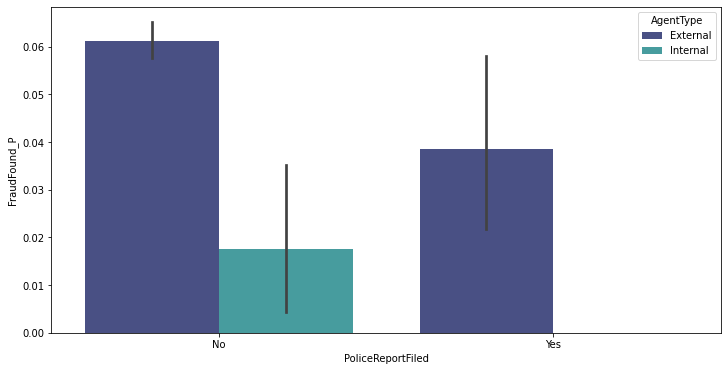

In [345]:
plt.figure(figsize=(12,6))
sns.barplot(x="PoliceReportFiled", y= "FraudFound_P", hue="AgentType", data=data,palette='mako')

<font size="3.5">**Insights**</font><br>There is no filed policy report for those who buy auto insurance through internal agent.

Text(0.5, 1.0, 'Number of claim applications are fraudulent')

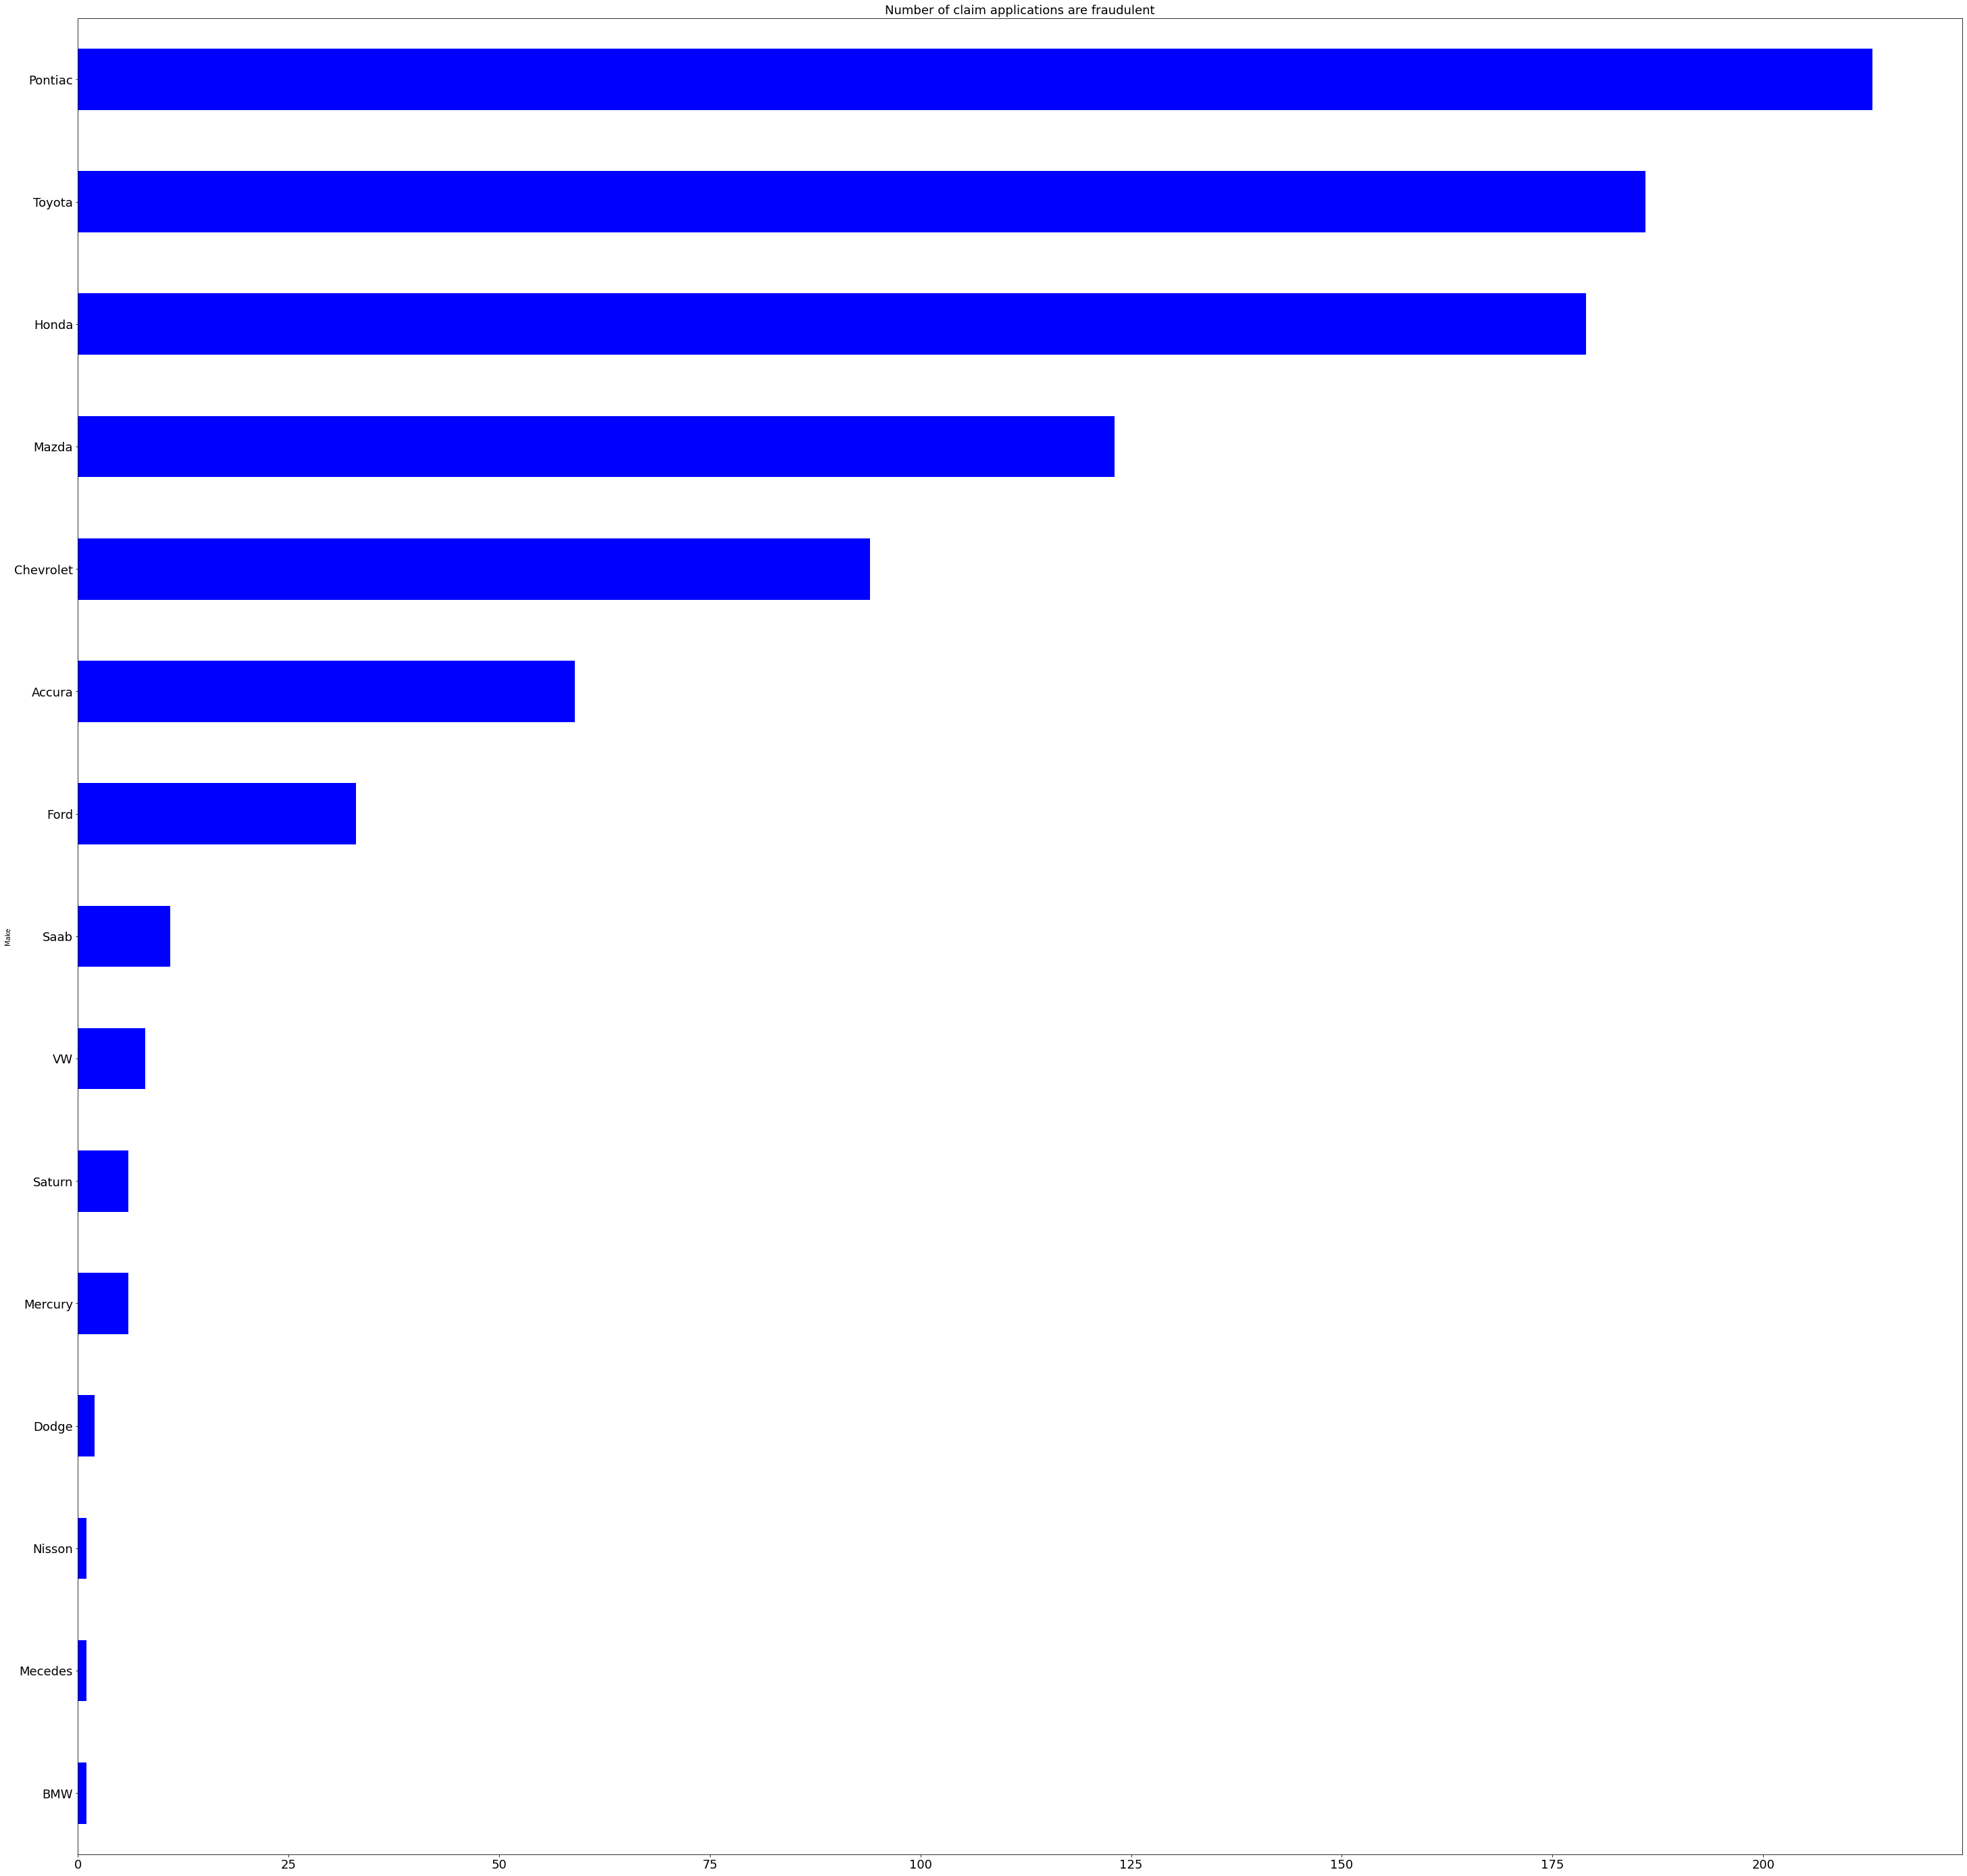

In [346]:
fig = plt.figure(figsize=(50,50))
data[data['FraudFound_P'] == 1].groupby(
    'Make')['FraudFound_P'].count().sort_values().plot(kind='barh',fontsize=18, color="blue")

plt.title('Number of claim applications are fraudulent', fontsize=18)

<font size="4">**2.6 Encoding Categorical and Standardizing Numeric Variables**</font>

ordinal encoding first

In [347]:
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'Days_Policy_Accident','mapping':{'none':0,'1 to 7':1,'8 to 15':2, '15 to 30':3, 'more than 30':4}},
     {'col':'Days_Policy_Claim','mapping':{'more than 30':30,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1, '2 vehicles':2, '3 to 4':3, '5 to 8':4, 'more than 8':5}},
    {'col':'AddressChange_Claim','mapping':{'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [348]:
data_ordinal = data_train[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X1 = ord_encoder.fit_transform(data_ordinal)

data_ordinal = data_test[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X2 = ord_encoder.fit_transform(data_ordinal)


data_ordinal = data_val[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X3 = ord_encoder.fit_transform(data_ordinal)

In [349]:
X1#done with the ordinal encoding

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,AddressChange_Claim,AgeOfVehicle
0,2,3,1.0,2.0,0,0,24500,4,30,3,0,8
1,5,1,2.0,5.0,1,1,24500,4,30,1,0,8
2,12,2,5.0,12.0,2,3,24500,4,30,1,0,5
3,4,6,3.0,4.0,0,6,24500,4,30,1,0,6
4,3,3,5.0,3.0,1,1,34500,0,11,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10789,12,4,5.0,12.0,1,6,24500,4,30,1,0,7
10790,4,4,1.0,4.0,2,3,69001,4,30,3,4,7
10791,8,6,3.0,8.0,0,1,24500,4,30,1,0,7
10792,4,6,4.0,4.0,2,6,24500,4,30,1,0,5


In [350]:
data_train_ord=data_train.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])
data_test_ord=data_test.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])
data_val_ord=data_val.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim', 'NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])

In [351]:
data_train_ord#remove the ordinal encoding variables in the data_train

,WeekOfMonth,Make,AccidentArea,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,3,Honda,Urban,3,Male,Married,39.0,Policy Holder,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
1,2,Toyota,Urban,2,Male,Married,62.0,Third Party,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
2,1,Toyota,Urban,2,Male,Married,24.0,Policy Holder,Sedan - Liability,Sport,0,400,3,No,No,External,Liability
3,1,Mazda,Urban,1,Male,Single,28.0,Policy Holder,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
4,4,Dodge,Urban,4,Male,Married,53.0,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,4,Honda,Urban,4,Male,Married,56.0,Third Party,Sedan - All Perils,Sedan,0,400,4,No,No,External,All Perils
10790,1,Chevrolet,Urban,2,Male,Single,46.0,Policy Holder,Utility - All Perils,Utility,0,400,3,No,No,External,All Perils
10791,1,Chevrolet,Rural,2,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,0,400,2,No,No,External,Liability
10792,3,Honda,Urban,3,Female,Single,30.0,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision


In [352]:
data_train = pd.concat([X1,data_train_ord], axis=1, join='inner')
data_test= pd.concat([X2,data_test_ord], axis=1, join='inner')
data_val= pd.concat([X3,data_test_ord], axis=1, join='inner')
#combine them

In [353]:
data_train

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,2,3,1.0,2.0,0,0,24500,4,30,3,...,Policy Holder,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
1,5,1,2.0,5.0,1,1,24500,4,30,1,...,Third Party,Sedan - Collision,Sedan,0,400,2,No,No,External,Collision
2,12,2,5.0,12.0,2,3,24500,4,30,1,...,Policy Holder,Sedan - Liability,Sport,0,400,3,No,No,External,Liability
3,4,6,3.0,4.0,0,6,24500,4,30,1,...,Policy Holder,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
4,3,3,5.0,3.0,1,1,34500,0,11,1,...,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,12,4,5.0,12.0,1,6,24500,4,30,1,...,Third Party,Sedan - All Perils,Sedan,0,400,4,No,No,External,All Perils
10790,4,4,1.0,4.0,2,3,69001,4,30,3,...,Policy Holder,Utility - All Perils,Utility,0,400,3,No,No,External,All Perils
10791,8,6,3.0,8.0,0,1,24500,4,30,1,...,Policy Holder,Sedan - Liability,Sport,0,400,2,No,No,External,Liability
10792,4,6,4.0,4.0,2,6,24500,4,30,1,...,Third Party,Sedan - Collision,Sedan,0,400,3,No,No,External,Collision


encode other variables ,lable and onehot

In [354]:
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder
def encoding (data):
  #Ordinal Encode
  #data_ordinal=['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed',
  #               'VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
  #               'PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',
  #               'AddressChange_Claim','NumberOfCars']

  
  #Label Encode
  data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]
  label_encoder = preprocessing.LabelEncoder()
  for i in  data_cat_label:
    data[i] = label_encoder.fit_transform(data[i])
  
  #One hot Encode
  onehotencoder = OneHotEncoder(handle_unknown='ignore')
  data_hot_label = ['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']
  
  
#numeric
  min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
  data_num = ['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating',
              'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_num] = min_max_scaler.fit_transform(data[data_num])

  return data  

In [355]:
data_train_t= encoding(data_train)
data_val_t = encoding(data_val)
data_test_t = encoding(data_test)

In [356]:
data_train_t

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0,Sedan - Collision,Sedan,0,-0.5,-0.333333,0,0,0,Collision
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,-0.333333,0,0,0,Collision
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Liability,Sport,0,-0.5,0.333333,0,0,0,Liability
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,1.000000,0.000000,0.50,1.000000,-0.6,1.000000,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - All Perils,Sedan,0,-0.5,1.000000,0,0,0,All Perils
10790,-0.454545,0.000000,-0.50,-0.230769,-0.2,0.000000,1.000000,1.0,1.000000,0.0,...,0,Utility - All Perils,Utility,0,-0.5,0.333333,0,0,0,All Perils
10791,0.272727,0.666667,0.00,0.384615,-1.0,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0,Sedan - Liability,Sport,0,-0.5,-0.333333,0,0,0,Liability
10792,-0.454545,0.666667,0.25,-0.230769,-0.2,1.000000,-0.816293,1.0,1.000000,-1.0,...,1,Sedan - Collision,Sedan,0,-0.5,0.333333,0,0,0,Collision


In [357]:
data_train_s=data_train_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [358]:
data_test_s=data_test_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [359]:
data_val_s=data_val_t.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])

In [368]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_train_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_train_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
y = data_train_t[['FraudFound_P']]
y = pd.DataFrame(y,columns=['FraudFound_P'])
data_train = pd.concat([y,data_train_s,data_train_t2], axis=1, join='inner')
data_train.head()

,FraudFound_P,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,...,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [326]:
cat_encoder.get_feature_names_out()

array(['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar',
       'Make_Lexus', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury',
       'Make_Nisson', 'Make_Pontiac', 'Make_Porche', 'Make_Saab',
       'Make_Saturn', 'Make_Toyota', 'Make_VW', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widow', 'PolicyType_Sedan - All Perils',
       'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision',
       'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'], dtype=object)

In [367]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_test_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]
data_cat_hot
pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_test_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
y = data_test_t[['FraudFound_P']]
y = pd.DataFrame(y,columns=['FraudFound_P'])
data_test = pd.concat([y,data_test_s,data_test_t2], axis=1, join='inner')
data_test.head()

,FraudFound_P,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0,-0.818182,-1.000000,-0.666667,-0.818182,-0.2,-1.0,-1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0.454545,0.333333,-1.000000,0.454545,-0.6,1.0,-0.816293,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,-0.818182,-0.666667,-0.666667,-0.636364,-0.2,-1.0,-1.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0.818182,1.000000,0.333333,1.000000,-0.2,1.0,-0.408147,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.090909,-0.666667,0.333333,-0.090909,1.0,-1.0,-0.816293,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [369]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
data_cat_hot = data_val_t[['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']]

pd.get_dummies(data_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(data_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

data_val_t2= pd.DataFrame(cat_encoder.transform(data_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=data_cat_hot.index)
y = data_val_t[['FraudFound_P']]
y = pd.DataFrame(y,columns=['FraudFound_P'])
data_val = pd.concat([y,data_val_s,data_val_t2], axis=1, join='inner')
data_val.head()

,FraudFound_P,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0,0.636364,-1.000000,-0.666667,0.636364,-1.0,0.000000,-0.408147,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0.454545,0.333333,0.000000,0.454545,1.0,-0.666667,-0.816293,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,-0.454545,-1.000000,-0.666667,-0.454545,-0.2,-0.666667,-0.408147,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,-0.818182,-0.666667,-1.000000,-0.818182,-0.6,-1.000000,-0.816293,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.636364,0.000000,0.333333,-0.636364,-0.6,1.000000,-0.408147,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [324]:
cat_encoder.get_feature_names_out()

array(['Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ford', 'Make_Honda', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils',
       'PolicyType_Sport - Collision', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'], dtype=object)

The column size is different in train and test,val data set since there are some car make and policy type only included in the train data set.
So in the feature selection part,we will exclude those columns.

<font size="4">**2.7 Outlier detection**</font>

In [370]:
from numpy import where
from sklearn.ensemble import IsolationForest
def outlier (data):
  iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
  pred = iforest.fit_predict(data)
  score = iforest.decision_function(data)
  anom_index = where(pred==-1)
  values = data.iloc[anom_index]
  data = data[~data.index.isin(values.index)]
  return data  

In [371]:
data_train = outlier(data_train)
data_val = outlier(data_val)
data_test = outlier(data_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<font size="4">**2.8 Final train, test and validation dataset**</font>

In [391]:

data_train.to_csv("Fraud_train.csv")



data_test.to_csv("Fraud_test.csv")


data_val.to_csv("Fraud_val.csv")

<font size="5">**3. Feature Selection**</font>

In [386]:
X_train = data_train.drop(columns = ['FraudFound_P'])
y_train = data_train['FraudFound_P']
X_test = data_test.drop(columns = ['FraudFound_P'])
y_test = data_test['FraudFound_P']
X_val = data_test.drop(columns = ['FraudFound_P'])
y_val = data_test['FraudFound_P']

In [374]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=5)
forest_reg.fit(X_train,y_train)

features = pd.DataFrame(list(zip(X_train.columns,forest_reg.feature_importances_)), columns = ['predictor', 'feature importance']).sort_values(ascending=False, by = 'feature importance')
features

,predictor,feature importance
16,Age,0.136827
1,DayOfWeek,0.068585
3,MonthClaimed,0.065131
0,Month,0.063232
2,DayOfWeekClaimed,0.062165
...,...,...
51,PolicyType_Sport - Liability,0.000000
48,PolicyType_Sedan - Liability,0.000000
31,Make_Lexus,0.000000
27,Make_Ferrari,0.000000


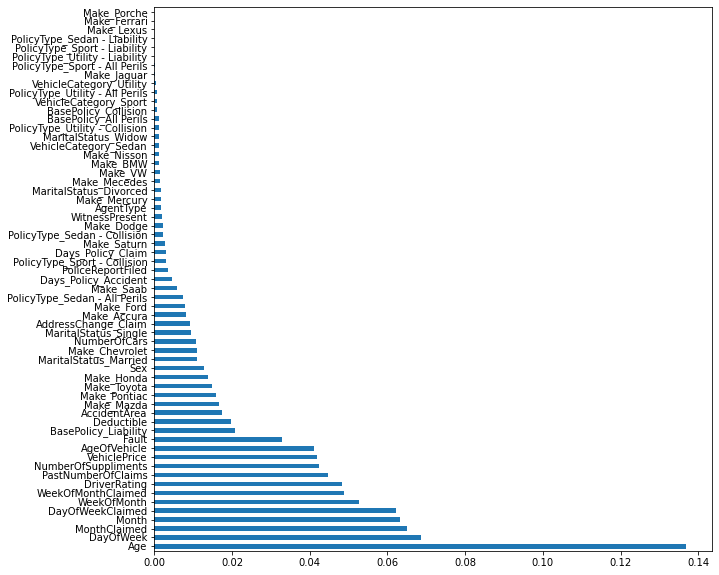

In [375]:
features = pd.Series(forest_reg.feature_importances_, index=X_train.columns)
features.nlargest(65).plot(kind='barh',figsize=(10,10))
plt.show()

In [387]:
X_train.drop(columns=['Make_Lexus','Make_Ferrari','Make_Porche',"PolicyType_Sport - Liability","PolicyType_Sedan - Liability",'Make_Jaguar','Make_Lexus'])


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-0.333333,-0.50,-0.538462,-1.0,-1.000000,-0.816293,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.272727,-1.000000,-0.25,-0.076923,-0.6,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,-0.666667,0.50,1.000000,-0.2,0.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.454545,0.666667,0.00,-0.230769,-1.0,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.636364,-0.333333,0.50,-0.384615,-0.6,-0.666667,-0.408147,-1.0,-0.266667,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,-0.636364,0.333333,-0.50,-0.384615,1.0,-1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10789,1.000000,0.000000,0.50,1.000000,-0.6,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10791,0.272727,0.666667,0.00,0.384615,-1.0,-0.666667,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10792,-0.454545,0.666667,0.25,-0.230769,-0.2,1.000000,-0.816293,1.0,1.000000,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [389]:
X_test.drop(columns=['Make_Porche',"PolicyType_Sedan - Liability"])

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-1.000000,-0.666667,-0.818182,-0.2,-1.000000,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,-1.000000,0.454545,-0.6,1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.818182,-0.666667,-0.666667,-0.636364,-0.2,-1.000000,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.818182,1.000000,0.333333,1.000000,-0.2,1.000000,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.090909,-0.666667,0.333333,-0.090909,1.0,-1.000000,-0.816293,1.0,1.0,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,0.272727,0.333333,-0.666667,0.272727,1.0,1.000000,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2309,1.000000,1.000000,-1.000000,1.000000,-0.2,-0.666667,-0.408147,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2310,0.454545,0.666667,0.000000,0.454545,-0.6,1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2311,0.272727,-0.333333,0.333333,0.454545,-1.0,-1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [390]:
X_val.drop(columns=['Make_Porche',"PolicyType_Sedan - Liability"])

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,-0.818182,-1.000000,-0.666667,-0.818182,-0.2,-1.000000,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.454545,0.333333,-1.000000,0.454545,-0.6,1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.818182,-0.666667,-0.666667,-0.636364,-0.2,-1.000000,-1.000000,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.818182,1.000000,0.333333,1.000000,-0.2,1.000000,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.090909,-0.666667,0.333333,-0.090909,1.0,-1.000000,-0.816293,1.0,1.0,-0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,0.272727,0.333333,-0.666667,0.272727,1.0,1.000000,-0.408147,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2309,1.000000,1.000000,-1.000000,1.000000,-0.2,-0.666667,-0.408147,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2310,0.454545,0.666667,0.000000,0.454545,-0.6,1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2311,0.272727,-0.333333,0.333333,0.454545,-1.0,-1.000000,-0.816293,1.0,1.0,-1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
